# Capstone Project

In [1]:
import numpy as np
import pandas as pd

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


# Introduction/Business Problem 

-to solve this problem , i ll review the dataset. so we will have three type of features
    * X : they will be used to predict target ones
    * Y: Targets
    * not relevant : to be droped
-each X  feature will be reviewed for NAN value to be replaced, then values are standarized.

-Finally, we use X to predict Y through different models

# Data 

* X : [X,Y,ADDRTYPE,INTKEY,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,LIGHTCOND
,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR]


* Y :[SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE]


* Drop : ['OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS' 
'LOCATION','EXCEPTRSNDESC','EXCEPTRSNCODE','SEVERITYCODE.1','SEVERITYDESC'
,'INCDATE','SDOT_COLDESC','SDOTCOLNUM','ST_COLDESC']

In [3]:
df=pd.read_csv(r'Data-Collisions.csv')

C:\Users\mohammad\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#df.iloc[:,38]
drop=['OBJECTID','INCKEY','INTKEY','COLDETKEY','REPORTNO','STATUS' ,'LOCATION','EXCEPTRSNDESC','EXCEPTRSNCODE','SEVERITYCODE.1','SEVERITYDESC'
     ,'INCDATE','SDOT_COLDESC','SDOTCOLNUM','ST_COLDESC']
df1=df.drop(drop,axis=1)
df1.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,Angles,2,0,0,2,3/27/2013 2:54:00 PM,...,N,Overcast,Wet,Daylight,NaN,NaN,10,0,0,N
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,...,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,0,0,N
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,...,0,Overcast,Dry,Daylight,NaN,NaN,32,0,0,N
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,3/29/2013 9:26:00 AM,...,N,Clear,Dry,Daylight,NaN,NaN,23,0,0,N
4,2,-122.306426,47.545739,Intersection,Angles,2,0,0,2,1/28/2004 8:04:00 AM,...,0,Raining,Wet,Daylight,NaN,NaN,10,0,0,N


In [5]:
for i in df1.columns:
    print(100*df1.isna()[i].value_counts()/df1.isna()[i].count())
#x=[X,Y,ADDRTYPE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR]    
#Y=[SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE]

False    100.0
Name: SEVERITYCODE, dtype: float64
False    97.260021
True      2.739979
Name: X, dtype: float64
False    97.260021
True      2.739979
Name: Y, dtype: float64
False    99.010649
True      0.989351
Name: ADDRTYPE, dtype: float64
False    97.480904
True      2.519096
Name: COLLISIONTYPE, dtype: float64
False    100.0
Name: PERSONCOUNT, dtype: float64
False    100.0
Name: PEDCOUNT, dtype: float64
False    100.0
Name: PEDCYLCOUNT, dtype: float64
False    100.0
Name: VEHCOUNT, dtype: float64
False    100.0
Name: INCDTTM, dtype: float64
False    96.748907
True      3.251093
Name: JUNCTIONTYPE, dtype: float64
False    100.0
Name: SDOT_COLCODE, dtype: float64
True     84.68971
False    15.31029
Name: INATTENTIONIND, dtype: float64
False    97.491178
True      2.508822
Name: UNDERINFL, dtype: float64
False    97.389982
True      2.610018
Name: WEATHER, dtype: float64
False    97.425426
True      2.574574
Name: ROADCOND, dtype: float64
False    97.344264
True      2.655736
Name: L

In [6]:
#consider Nan values as No 
df1['INATTENTIONIND'].replace(np.NAN,'N',inplace=True)
df1['UNDERINFL'].replace('0','N',inplace=True)
df1['UNDERINFL'].replace('1','Y',inplace=True)
df1['SPEEDING'].replace(np.NAN,'N',inplace=True)
df1['PEDROWNOTGRNT'].replace(np.NAN,'N',inplace=True)

In [7]:
# deal with other and unknown values as NaN
df1['COLLISIONTYPE'].replace('Other',np.NAN,inplace=True)
df1['JUNCTIONTYPE'].replace('Unknown',np.NAN,inplace=True)
df1['WEATHER'].replace('Other',np.NAN,inplace=True)
df1['WEATHER'].replace('Unknown',np.NAN,inplace=True)
df1['ROADCOND'].replace('Other',np.NAN,inplace=True)
df1['ROADCOND'].replace('Unknown',np.NAN,inplace=True)
df1['LIGHTCOND'].replace('Other',np.NAN,inplace=True)
df1['LIGHTCOND'].replace('Unknown',np.NAN,inplace=True)


In [8]:
#drop NaN values for SEVERITYCODE
df1.dropna(subset=['SEVERITYCODE'],how='any',inplace=True)

In [9]:
# separate to tow main classes 1 and 2
df_1=df1[df1['SEVERITYCODE']==1]
df_2=df1[df1['SEVERITYCODE']==2]

In [10]:
# compute mean values for each numeric feature for each class after removing NaN
mean1=df_1[ df_1.notna()]._get_numeric_data().mean()

mean2=df_2[ df_2.notna()]._get_numeric_data().mean()


In [11]:
#make dictionaries for mean values
mean1={'X':mean1[1],'Y':mean1[2],'PERSONCOUNT':mean1[3],'PEDCOUNT':mean1[4],'PEDCYLCOUNT':mean1[5],'VEHCOUNT':mean1[6],'SDOT_COLCODE':mean1[7],'SEGLANEKEY':mean1[8],'CROSSWALKKEY':mean1[9]}

mean2={'X':mean2[1],'Y':mean2[2],'PERSONCOUNT':mean2[3],'PEDCOUNT':mean2[4],'PEDCYLCOUNT':mean2[5],'VEHCOUNT':mean2[6],'SDOT_COLCODE':mean2[7],'SEGLANEKEY':mean2[8],'CROSSWALKKEY':mean2[9]}


In [12]:
#fill NaN in numeric features with suitable values
df_1.fillna(value=mean1,axis=0,inplace=True)
df_2.fillna(value=mean2,axis=0,inplace=True)

C:\Users\mohammad\Miniconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [13]:
# fill object features NaN values with Mode values for class 1 
for i in df_1[ df_1.notna()].columns:
    if df_1[ df_1.notna()].loc[:,i].dtype=='object':
        df_1.loc[:,i].fillna(value=df_1[ df_1.notna()].loc[:,i].value_counts().idxmax(),axis=0,inplace=True)
        print(i,':',df_1[ df_1.notna()].loc[:,i].value_counts().idxmax())


ADDRTYPE : Block
COLLISIONTYPE : Parked Car
INCDTTM : 10/3/2008
JUNCTIONTYPE : Mid-Block (not related to intersection)
INATTENTIONIND : N
UNDERINFL : N
WEATHER : Clear
ROADCOND : Dry
LIGHTCOND : Daylight
PEDROWNOTGRNT : N
SPEEDING : N
ST_COLCODE : 32
HITPARKEDCAR : N


In [14]:
# fill object features NaN values with Mode values for class 2
for i in df_2[ df_2.notna()].columns:
    if df_2[ df_2.notna()].loc[:,i].dtype=='object':
        df_2.loc[:,i].fillna(value=df_2[ df_2.notna()].loc[:,i].value_counts().idxmax(),axis=0,inplace=True)
        print(i,':',df_2[ df_2.notna()].loc[:,i].value_counts().idxmax())


ADDRTYPE : Block
COLLISIONTYPE : Rear Ended
INCDTTM : 11/2/2006
JUNCTIONTYPE : At Intersection (intersection related)
INATTENTIONIND : N
UNDERINFL : N
WEATHER : Clear
ROADCOND : Dry
LIGHTCOND : Daylight
PEDROWNOTGRNT : N
SPEEDING : N
ST_COLCODE : 10
HITPARKEDCAR : N


In [15]:
# dataframe after cleaning
df1=pd.concat([df_1,df_2])
df1.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,...,N,Raining,Wet,Dark - Street Lights On,N,N,11,0,0,N
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,...,N,Overcast,Dry,Daylight,N,N,32,0,0,N
3,1,-122.334803,47.604803,Block,Parked Car,3,0,0,3,3/29/2013 9:26:00 AM,...,N,Clear,Dry,Daylight,N,N,23,0,0,N
5,1,-122.387598,47.690575,Intersection,Angles,2,0,0,2,4/20/2019 5:42:00 PM,...,N,Clear,Dry,Daylight,N,N,10,0,0,N
6,1,-122.338485,47.618534,Intersection,Angles,2,0,0,2,12/9/2008,...,N,Raining,Wet,Daylight,N,N,10,0,0,N


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency,normaltest

In C:\Users\mohammad\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\mohammad\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\mohammad\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [17]:
#function to draw bar chart for categorical features clustered according to severitycode classes (1,2)
# y axis show the persent value of each class for each category in categorical features
def draw_bar_perc(c):
    ((df1.groupby([c,'SEVERITYCODE']).count()['ST_COLCODE']/df1.groupby([c]).count()['ST_COLCODE'])*100).unstack().plot(kind='bar')
    


In [132]:
def draw_bar_count(c):
    ((df1.groupby([c,'SEVERITYCODE']).count()['ST_COLCODE'])).unstack().plot(kind='bar')

0.0

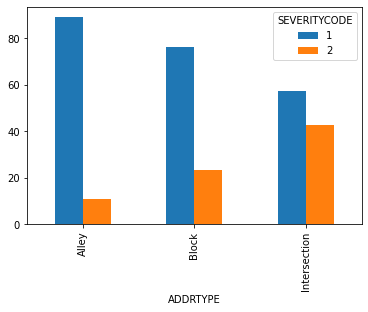

In [133]:
draw_bar_perc('ADDRTYPE')
chi2_contingency(pd.crosstab(df1['ADDRTYPE'],df1['SEVERITYCODE']))[1]

0.0

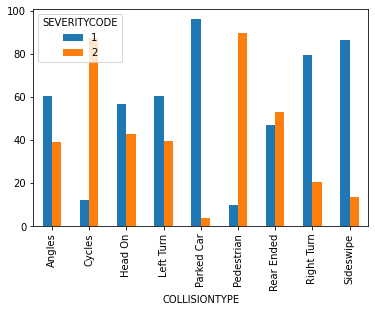

In [134]:
draw_bar_perc('COLLISIONTYPE')
chi2_contingency(pd.crosstab(df1['COLLISIONTYPE'],df1['SEVERITYCODE']))[1]

0.0

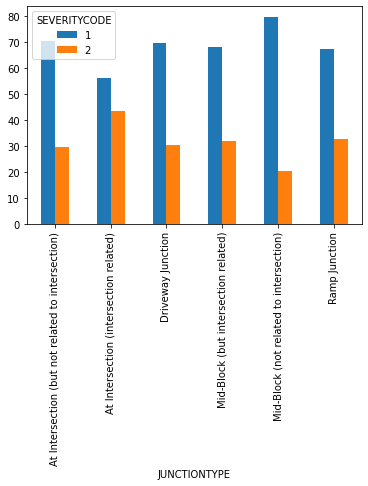

In [135]:
draw_bar_perc('JUNCTIONTYPE')
chi2_contingency(pd.crosstab(df1['JUNCTIONTYPE'],df1['SEVERITYCODE']))[1]

5.335191180698436e-93

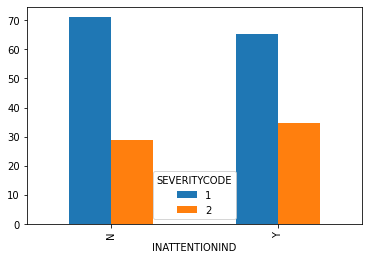

In [136]:
draw_bar_perc('INATTENTIONIND')
chi2_contingency(pd.crosstab(df1['INATTENTIONIND'],df1['SEVERITYCODE']))[1]

2.8963951861952226e-85

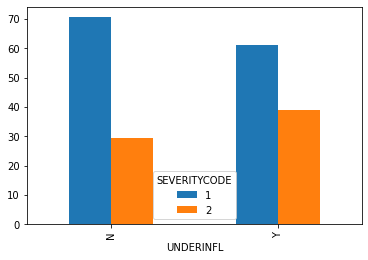

In [137]:
draw_bar_perc('UNDERINFL')
chi2_contingency(pd.crosstab(df1['UNDERINFL'],df1['SEVERITYCODE']))[1]

1.0022761144840179e-86

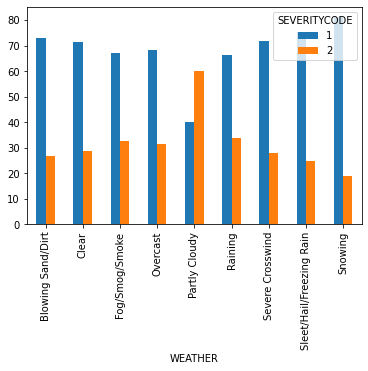

In [138]:
draw_bar_perc('WEATHER')
chi2_contingency(pd.crosstab(df1['WEATHER'],df1['SEVERITYCODE']))[1]

2.6123792997913166e-88

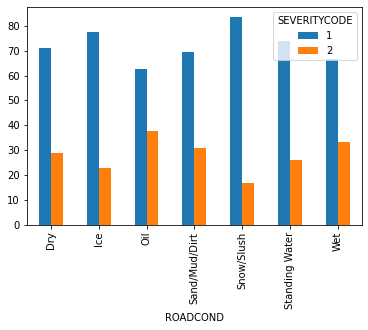

In [139]:
draw_bar_perc('ROADCOND')
chi2_contingency(pd.crosstab(df1['ROADCOND'],df1['SEVERITYCODE']))[1]

5.336920968434019e-18

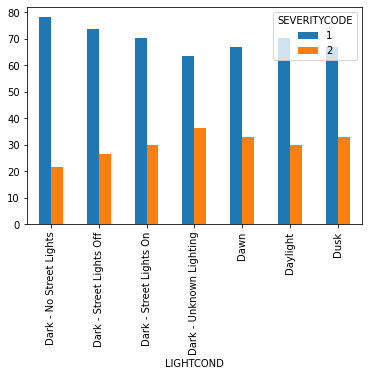

In [140]:
draw_bar_perc('LIGHTCOND')
chi2_contingency(pd.crosstab(df1['LIGHTCOND'],df1['SEVERITYCODE']))[1]

1.0022761144840179e-86

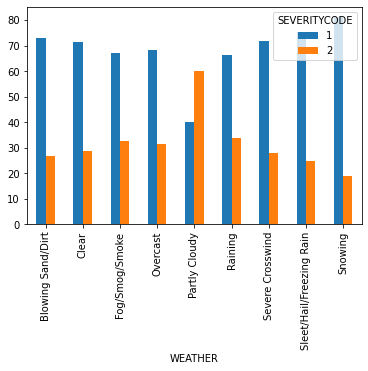

In [141]:
draw_bar_perc('WEATHER')
chi2_contingency(pd.crosstab(df1['WEATHER'],df1['SEVERITYCODE']))[1]

4.5554876319924223e-66

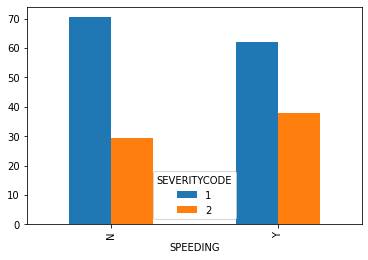

In [142]:
draw_bar_perc('SPEEDING')
chi2_contingency(pd.crosstab(df1['SPEEDING'],df1['SEVERITYCODE']))[1]

0.0

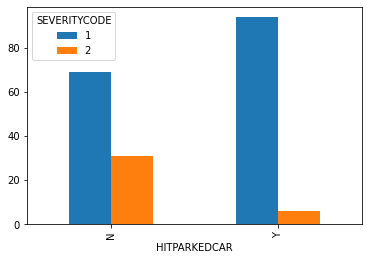

In [143]:
draw_bar_perc('HITPARKEDCAR')
chi2_contingency(pd.crosstab(df1['HITPARKEDCAR'],df1['SEVERITYCODE']))[1]

0.0

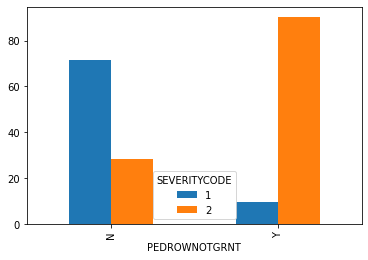

In [144]:
draw_bar_perc('PEDROWNOTGRNT')
chi2_contingency(pd.crosstab(df1['PEDROWNOTGRNT'],df1['SEVERITYCODE']))[1]

In [27]:
df1['INCDTTM']=pd.to_datetime(df1['INCDTTM'])

0.29460148535864267

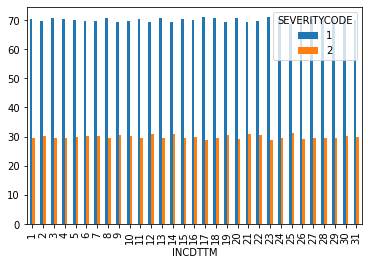

In [146]:
draw_bar_perc(df1['INCDTTM'].dt.day)
chi2_contingency(pd.crosstab(df1['INCDTTM'].dt.day,df1['SEVERITYCODE']))[1]

3.590857347063849e-18

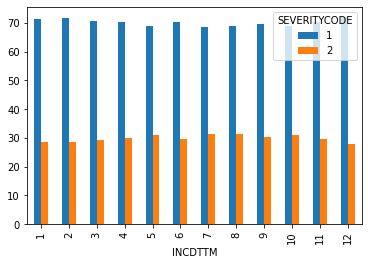

In [147]:
draw_bar_perc(df1['INCDTTM'].dt.month)
chi2_contingency(pd.crosstab(df1['INCDTTM'].dt.month,df1['SEVERITYCODE']))[1]

2.1322482284151897e-39

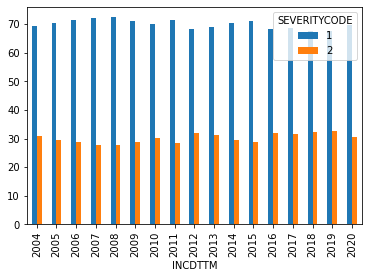

In [148]:
draw_bar_perc(df1['INCDTTM'].dt.year)
chi2_contingency(pd.crosstab(df1['INCDTTM'].dt.year,df1['SEVERITYCODE']))[1]

8.104007576719765e-167

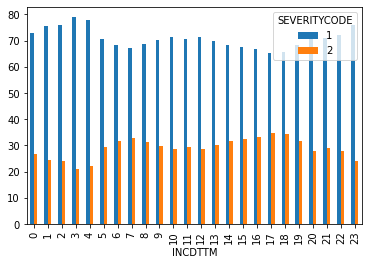

In [149]:
draw_bar_perc(df1['INCDTTM'].dt.hour)
chi2_contingency(pd.crosstab(df1['INCDTTM'].dt.hour,df1['SEVERITYCODE']))[1]

In [28]:
df1['Hour']=df1['INCDTTM'].dt.hour
df1['Month']=df1['INCDTTM'].dt.month
#df1['Year']=df1['INCDTTM'].dt.year



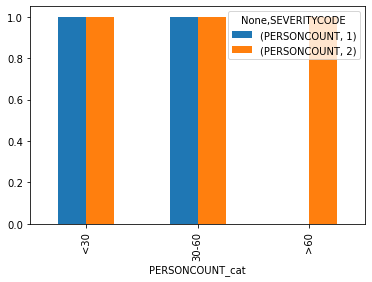

In [151]:
ax=plt.subplot(111)
bins = [-1,30,60,np.inf]
names = ['<30', '30-60',  '>60']

df1['PERSONCOUNT_cat'] = pd.cut(df1['PERSONCOUNT'], bins, labels=names)
#draw_bar_perc(df1['PERSONCOUNT_cat'])
#draw_bar_perc(df1['PERSONCOUNT'])
# draw_bar_count(df1['PEDCOUNT'])
# draw_bar_count(df1['PERSONCOUNT'])
# draw_bar_count(df1['PERSONCOUNT'])
#sns.distplot(df1['PERSONCOUNT'][df1['SEVERITYCODE']==1],hist_kws={'cumulative':True})
#sns.distplot(df1['PERSONCOUNT'][df1['SEVERITYCODE']==2],hist_kws={'cumulative':True})
#plt.hist(df1['PERSONCOUNT_cat'][df1['SEVERITYCODE']==1])
(df1[['PERSONCOUNT_cat','PERSONCOUNT','SEVERITYCODE']].groupby(['PERSONCOUNT_cat','SEVERITYCODE',]).count()/df1[['PERSONCOUNT_cat','PERSONCOUNT','SEVERITYCODE']].groupby(['PERSONCOUNT_cat','SEVERITYCODE']).count()).unstack().plot(kind='bar',ax=ax,)
#(df1[['PERSONCOUNT_cat','PERSONCOUNT']][df1['SEVERITYCODE']==2].groupby(['PERSONCOUNT_cat']).count()/df1[['PERSONCOUNT_cat','PERSONCOUNT']].groupby(['PERSONCOUNT_cat']).count()).plot(kind='bar',ax=ax)


<BarContainer object of 2 artists>

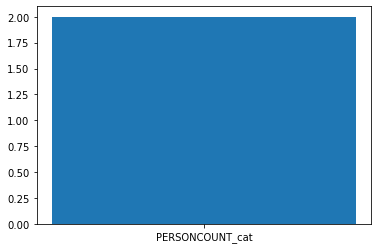

In [152]:
data=((df1[['PERSONCOUNT_cat','PERSONCOUNT','SEVERITYCODE']].groupby(['PERSONCOUNT_cat','SEVERITYCODE',]).count())/df1[['PERSONCOUNT_cat','PERSONCOUNT']].groupby(['PERSONCOUNT_cat']).count()).unstack()
plt.bar(x='PERSONCOUNT_cat',height='PERSONCOUNT',data=data)

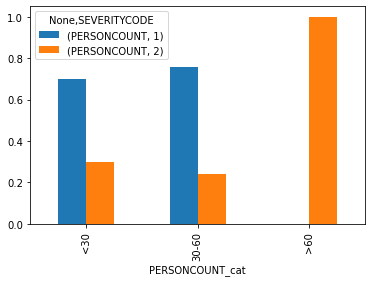

In [153]:
data.plot(kind='bar')


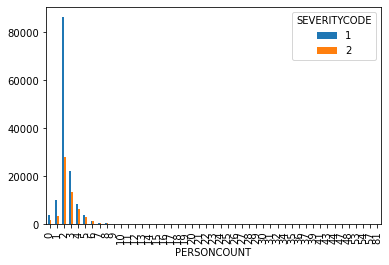

In [154]:
draw_bar_count(df1['PERSONCOUNT'])

0.0

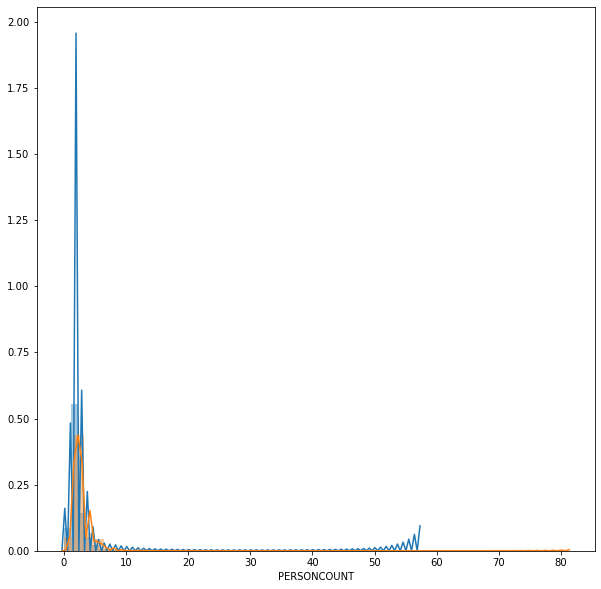

In [155]:
'','','',''
fig=plt.figure(figsize=(10,10))
ax=plt.subplot(111)

sns.distplot(df1['PERSONCOUNT'][df1['SEVERITYCODE']==1],ax=ax,kde_kws={'bw': 0.1})
sns.distplot(df1['PERSONCOUNT'][df1['SEVERITYCODE']==2],ax=ax,kde_kws={'bw': 0.1})

chi2_contingency(pd.crosstab(df1['PERSONCOUNT'],df1['SEVERITYCODE']))[1]

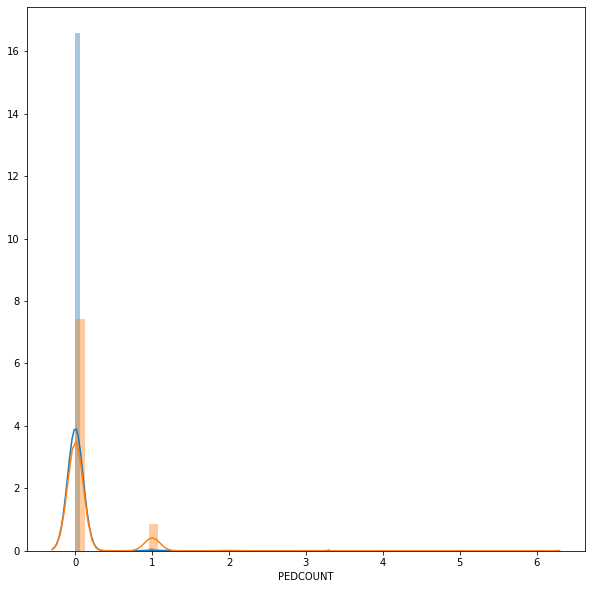

In [156]:
fig=plt.figure(figsize=(10,10))
ax=plt.subplot(111)
sns.distplot(df1['PEDCOUNT'][df1['SEVERITYCODE']==1],ax=ax,kde_kws={'bw': 0.1})
sns.distplot(df1['PEDCOUNT'][df1['SEVERITYCODE']==2],ax=ax,kde_kws={'bw': 0.1})

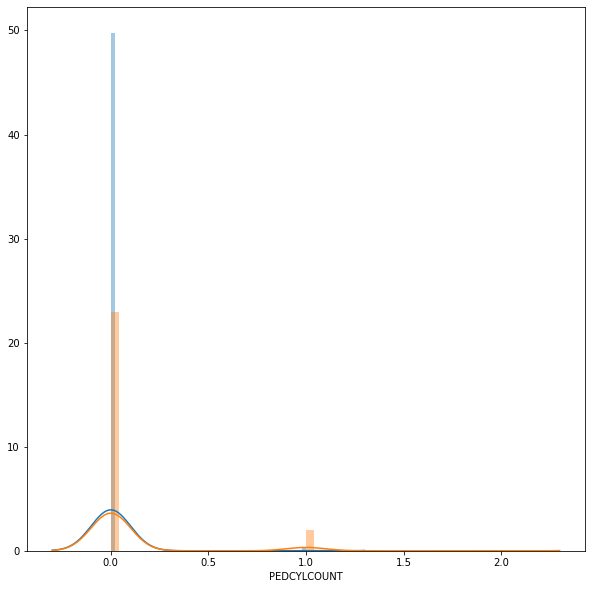

In [157]:
fig=plt.figure(figsize=(10,10))
ax=plt.subplot(111)
sns.distplot(df1['PEDCYLCOUNT'][df1['SEVERITYCODE']==1],ax=ax,kde_kws={'bw': 0.1})
sns.distplot(df1['PEDCYLCOUNT'][df1['SEVERITYCODE']==2],ax=ax,kde_kws={'bw': 0.1})

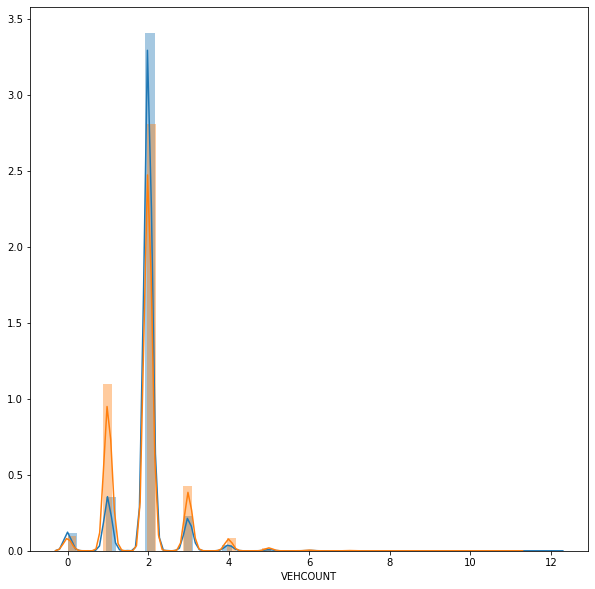

In [158]:
fig=plt.figure(figsize=(10,10))
ax=plt.subplot(111)
sns.distplot(df1['VEHCOUNT'][df1['SEVERITYCODE']==1],ax=ax,kde_kws={'bw': 0.1})
sns.distplot(df1['VEHCOUNT'][df1['SEVERITYCODE']==2],ax=ax,kde_kws={'bw': 0.1})

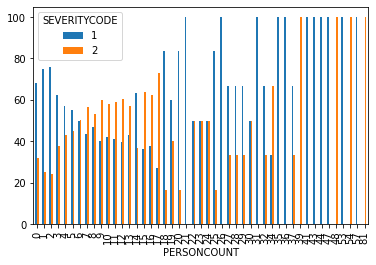

In [159]:
draw_bar_perc(df1['PERSONCOUNT'])

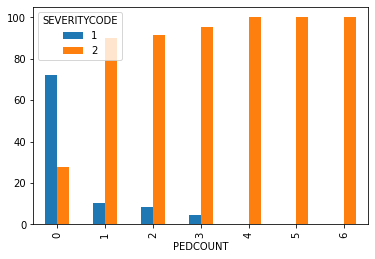

In [160]:
draw_bar_perc(df1['PEDCOUNT'])

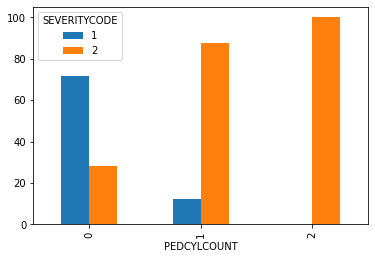

In [161]:
draw_bar_perc(df1['PEDCYLCOUNT'])

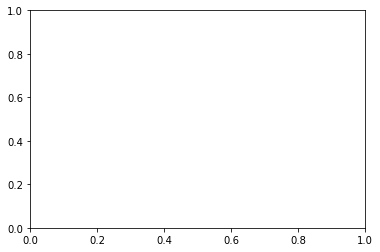

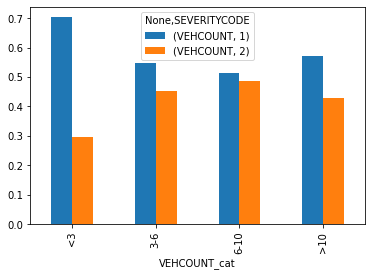

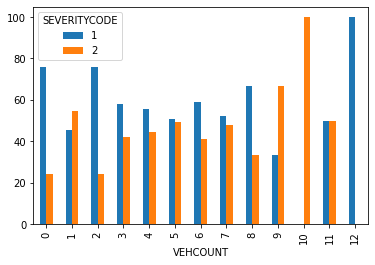

In [162]:
ax=plt.subplot(111)
bins = [-1,3,6,10,np.inf]
names = ['<3', '3-6','6-10',  '>10']

df1['VEHCOUNT_cat'] = pd.cut(df1['VEHCOUNT'], bins, labels=names)

data=((df1[['VEHCOUNT_cat','VEHCOUNT','SEVERITYCODE']].groupby(['VEHCOUNT_cat','SEVERITYCODE',]).count())/df1[['VEHCOUNT_cat','VEHCOUNT']].groupby(['VEHCOUNT_cat']).count()).unstack()
data.plot(kind='bar')

draw_bar_perc(df1['VEHCOUNT'])

Text(0.5, 0, 'Y')

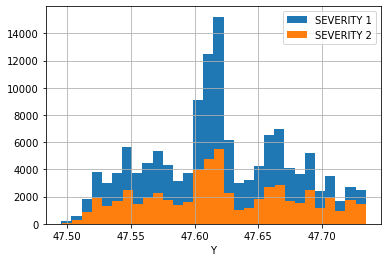

In [163]:
df1['Y'][df1['SEVERITYCODE']==1].hist(bins=30)
df1['Y'][df1['SEVERITYCODE']==2].hist(bins=30)
plt.legend(['SEVERITY 1','SEVERITY 2'])
plt.xlabel("Y")

Text(0.5, 0, 'X')

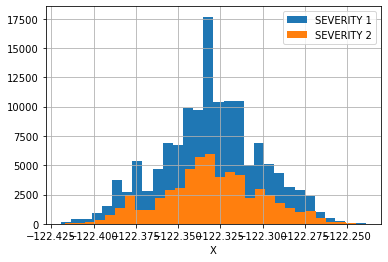

In [164]:
df1['X'][df1['SEVERITYCODE']==1].hist(bins=30)
df1['X'][df1['SEVERITYCODE']==2].hist(bins=30)
plt.legend(['SEVERITY 1','SEVERITY 2'])
plt.xlabel('X')

In [29]:
# analysis numeric features
df1._get_numeric_data().columns
#chi2_contingency(pd.crosstab(df1['ADDRTYPE'],df1['SEVERITYCODE']))[1]

Index(['SEVERITYCODE', 'X', 'Y', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'SDOT_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY', 'Hour',
       'Month'],
      dtype='object')

C:\Users\mohammad\Miniconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


[4.58574001e-06 3.66005171e-06 3.89767747e-06 ... 3.63155211e-06
 4.14150288e-06 5.15975230e-08]


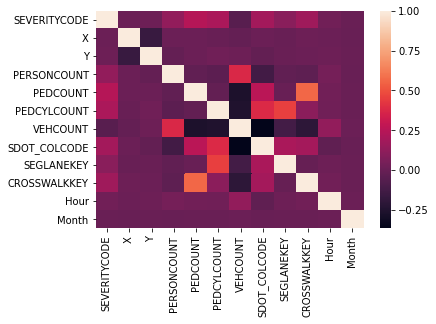

In [166]:
sns.heatmap(df1.corr())
print(normaltest(df1._get_numeric_data(),axis=1)[1])

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df2=scaler.fit_transform(df1._get_numeric_data())
df2=pd.DataFrame(df2,columns=df1._get_numeric_data().columns)
df2['SEVERITYCODE']=df2['SEVERITYCODE'].apply(lambda x:1 if ( x<0) else 2 )


X Ttest_indResult(statistic=-4.600169708800576, pvalue=4.224122661086044e-06)
-0.006807284150664517 0.0159670751767419
Y Ttest_indResult(statistic=-7.9156382379644, pvalue=2.4727048728788962e-15)
-0.04937123415429224 -0.04937123415429224
PERSONCOUNT Ttest_indResult(statistic=-58.27876111972112, pvalue=0.0)
-0.33020207385511424 -0.33020207385511424
PEDCOUNT Ttest_indResult(statistic=-112.14401726708239, pvalue=0.0)
-0.18743028624854363 -0.18743028624854363
PEDCYLCOUNT Ttest_indResult(statistic=-96.76261731490953, pvalue=0.0)
-0.16958840897224053 -0.16958840897224053
VEHCOUNT Ttest_indResult(statistic=24.164360243056954, pvalue=8.177903921506128e-129)
0.1255378252325378 0.1255378252325378
SDOT_COLCODE Ttest_indResult(statistic=-84.87588960356668, pvalue=0.0)
-0.4175102365871053 0.01925128298358212
SEGLANEKEY Ttest_indResult(statistic=-46.26023586762551, pvalue=0.0)
-0.08124849240009997 -0.08124849240009997
CROSSWALKKEY Ttest_indResult(statistic=-78.46606165264929, pvalue=0.0)
-0.13536152

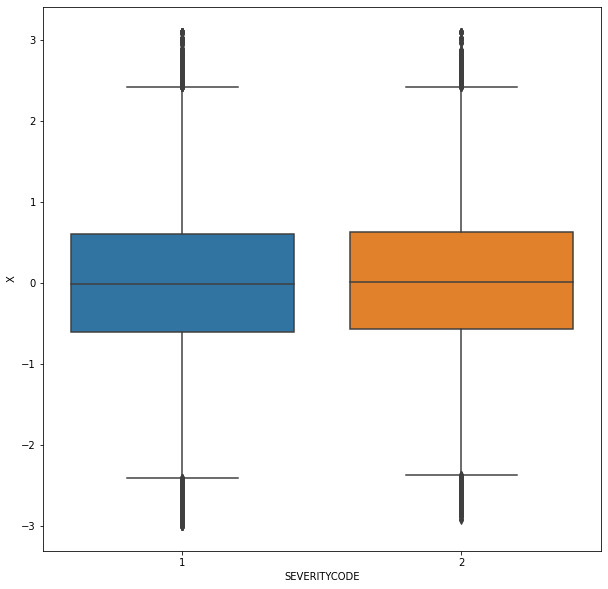

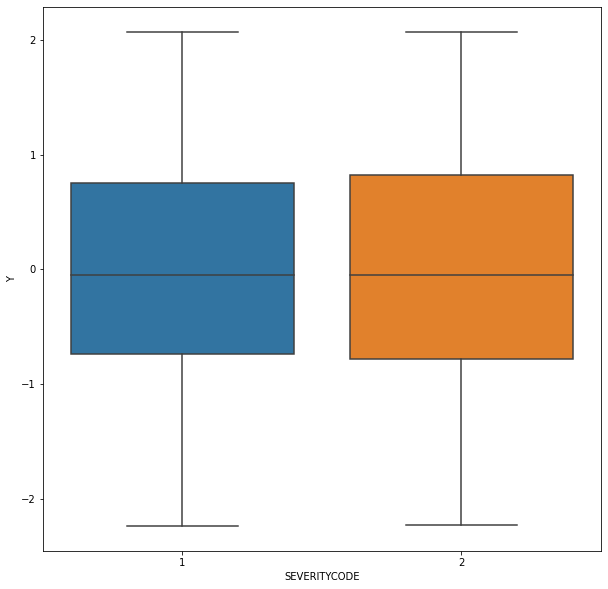

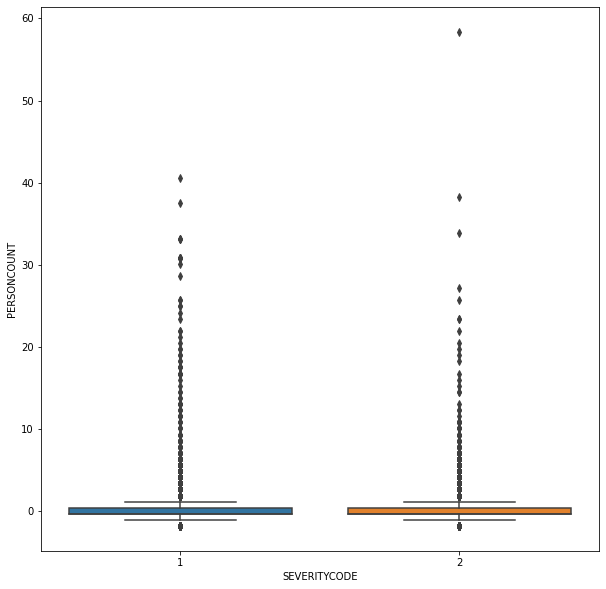

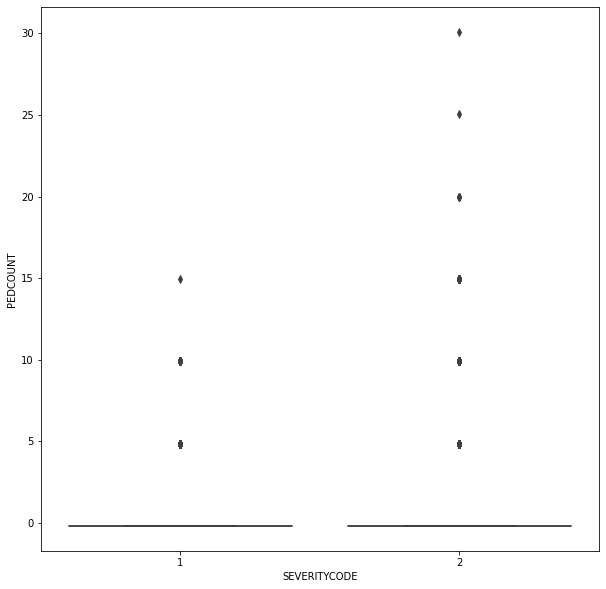

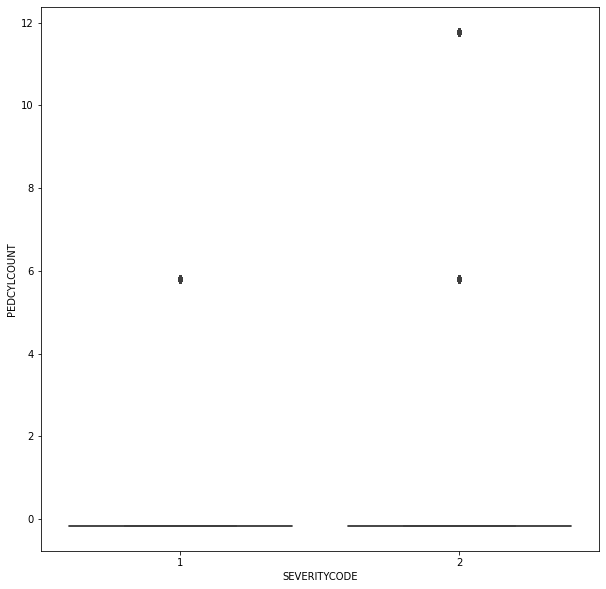

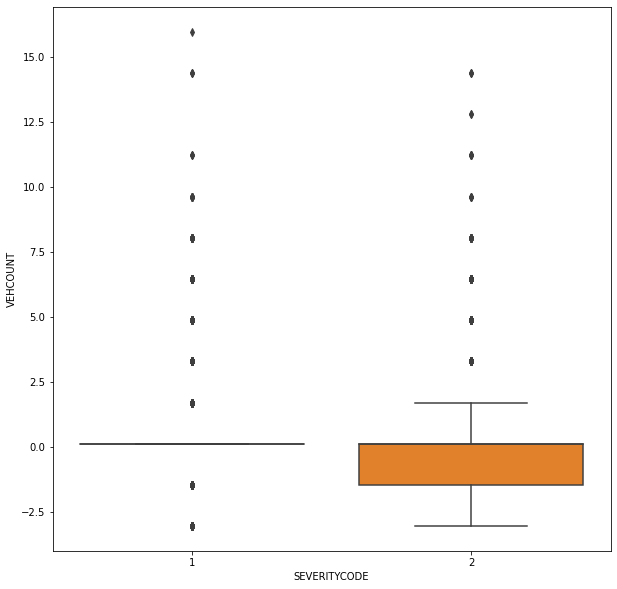

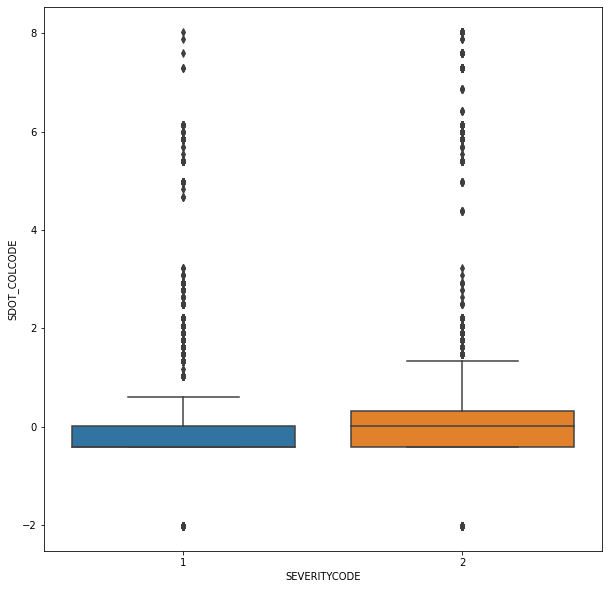

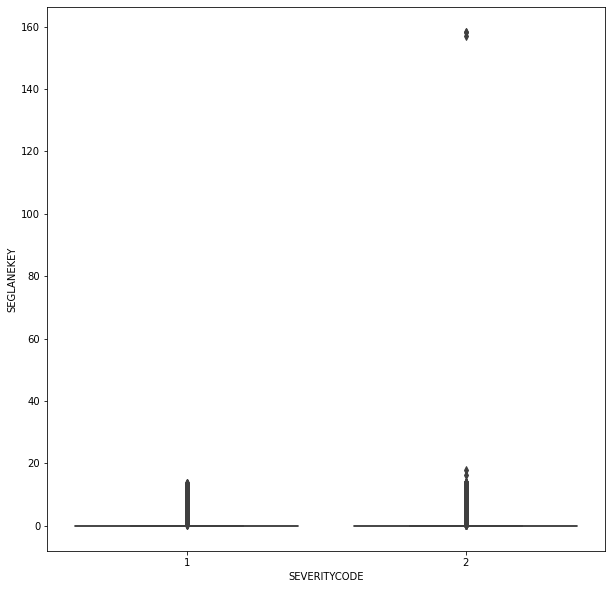

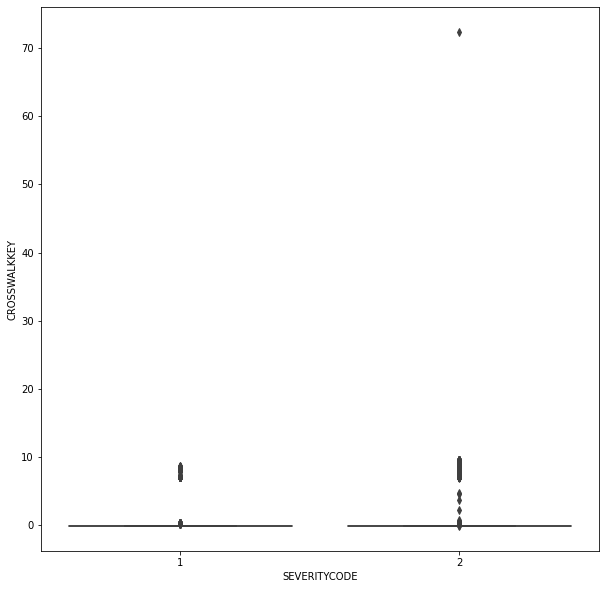

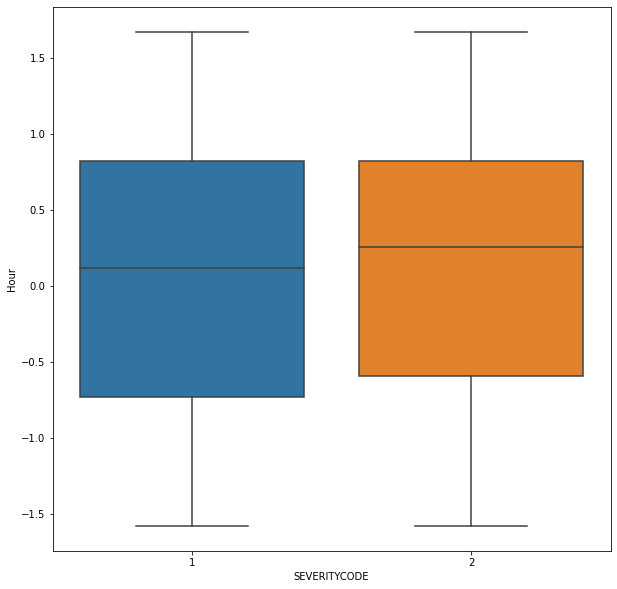

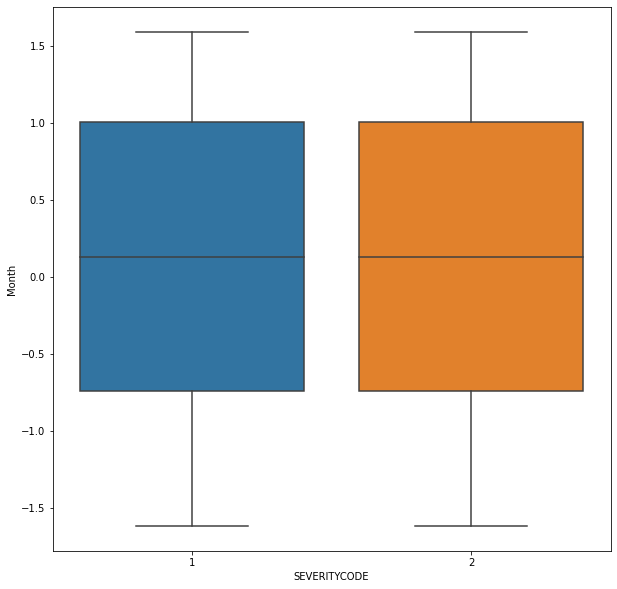

In [31]:
from scipy.stats import kruskal,mannwhitneyu,ttest_ind
for i in df2.columns[1:]:
    fig=plt.figure(figsize=(10,10))
    ax=plt.subplot(111)
    print(i,ttest_ind
         (df2[i][df2['SEVERITYCODE']==1],df2[i][df2['SEVERITYCODE']==2]))
    print(df2[i][df2['SEVERITYCODE']==1].median(),df2[i][df2['SEVERITYCODE']==2].median())
    sns.boxplot(x='SEVERITYCODE', y=i,  data=df2,ax=ax)
    #df2.boxplot(by='SEVERITYCODE',column=i)

In [32]:
# scalerX=StandardScaler()
# scalerY=StandardScaler()
# df1.loc[:,'X']=pd.Series(scalerX.fit_transform(np.array(df1['X']).reshape(-1,1)).reshape(1,-1)[0])
# df1.loc[:,'Y']=pd.Series(scalerY.fit_transform(np.array(df1['Y']).reshape(-1,1)).reshape(1,-1)[0])

In [33]:
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

In [34]:
x=['ADDRTYPE','COLLISIONTYPE','Hour','Month','JUNCTIONTYPE','INATTENTIONIND','UNDERINFL','WEATHER','LIGHTCOND','PEDROWNOTGRNT',
   'SPEEDING','HITPARKEDCAR']    
y=['SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','Year','VEHCOUNT','SDOT_COLCODE','X','Y','SEGLANEKEY','CROSSWALKKEY']

In [35]:

X=df1[x]
Y=df1[y[0]]

In [36]:
X['X']=df2['X']
X['Y']=df2['Y']
X['PERSONCOUNT']=df2['PERSONCOUNT']
X['PEDCOUNT']=df2['PEDCOUNT']
X['PEDCYLCOUNT']=df2['PEDCYLCOUNT']
X['VEHCOUNT']=df2['VEHCOUNT']

C:\Users\mohammad\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mohammad\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mohammad\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [37]:
X.head()

,ADDRTYPE,COLLISIONTYPE,Hour,Month,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
1,Block,Sideswipe,18,12,Mid-Block (not related to intersection),N,N,Raining,Dark - Street Lights On,N,N,N,-0.135973,-0.210629,1.155765,-0.18743,-0.169588,1.710211
2,Block,Parked Car,10,11,Mid-Block (not related to intersection),N,N,Overcast,Daylight,N,N,N,-0.144879,-0.266036,0.412781,-0.18743,-0.169588,1.710211
3,Block,Parked Car,9,3,Mid-Block (not related to intersection),N,N,Clear,Daylight,N,N,N,-1.930751,1.282708,-0.330202,-0.18743,-0.169588,0.125538
5,Intersection,Angles,17,4,At Intersection (intersection related),N,N,Clear,Daylight,N,N,N,-0.183002,-0.137824,-0.330202,-0.18743,-0.169588,0.125538
6,Intersection,Angles,0,12,At Intersection (intersection related),N,N,Raining,Daylight,N,N,N,-0.006807,-0.011712,-0.330202,-0.18743,-0.169588,0.125538


In [38]:
def to_gat(c,X):
    temp=label_binarize(X[c],classes=X[c].value_counts().index)
    temp=pd.DataFrame(temp,columns=X[c].value_counts().index)
    X=pd.concat([X,temp],axis=1)
    X.drop(columns=c,inplace=True)
    return X

In [39]:
obj=['ADDRTYPE','JUNCTIONTYPE','WEATHER','LIGHTCOND','COLLISIONTYPE'
     ]
num=['X','Y','SEGLANEKEY','CROSSWALKKEY']
#'SPEEDING','INATTENTIONIND','UNDERINFL','HITPARKEDCAR'
#'INCDTTM',
for i in obj:
    print(i)
    X=to_gat(i,X)

ADDRTYPE
JUNCTIONTYPE
WEATHER
LIGHTCOND
COLLISIONTYPE


In [40]:
X.head()

,Hour,Month,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,X,Y,PERSONCOUNT,...,Dark - Unknown Lighting,Parked Car,Rear Ended,Angles,Sideswipe,Left Turn,Pedestrian,Cycles,Right Turn,Head On
0,14,3,N,N,N,N,N,-0.567408,0.499007,-0.330202,...,0,0,0,1,0,0,0,0,0,0
1,18,12,N,N,N,N,N,-0.135973,-0.210629,1.155765,...,0,0,0,0,1,0,0,0,0,0
2,10,11,N,N,N,N,N,-0.144879,-0.266036,0.412781,...,0,1,0,0,0,0,0,0,0,0
3,9,3,N,N,N,N,N,-1.930751,1.282708,-0.330202,...,0,1,0,0,0,0,0,0,0,0
4,8,1,N,N,N,N,N,-0.269405,-0.018097,-0.330202,...,0,0,0,1,0,0,0,0,0,0


In [41]:
# for i in ['SPEEDING','INATTENTIONIND','UNDERINFL','HITPARKEDCAR','PEDROWNOTGRNT']:
#     X[i].replace('Y',1,inplace=True)
#     X[i].replace('N',0,inplace=True)

In [42]:
X.replace('Y','1',inplace=True)
X.replace('N','0',inplace=True)

In [43]:
X.head()

,Hour,Month,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,X,Y,PERSONCOUNT,...,Dark - Unknown Lighting,Parked Car,Rear Ended,Angles,Sideswipe,Left Turn,Pedestrian,Cycles,Right Turn,Head On
0,14,3,0,0,0,0,0,-0.567408,0.499007,-0.330202,...,0,0,0,1,0,0,0,0,0,0
1,18,12,0,0,0,0,0,-0.135973,-0.210629,1.155765,...,0,0,0,0,1,0,0,0,0,0
2,10,11,0,0,0,0,0,-0.144879,-0.266036,0.412781,...,0,1,0,0,0,0,0,0,0,0
3,9,3,0,0,0,0,0,-1.930751,1.282708,-0.330202,...,0,1,0,0,0,0,0,0,0,0
4,8,1,0,0,0,0,0,-0.269405,-0.018097,-0.330202,...,0,0,0,1,0,0,0,0,0,0


In [44]:
#X['INCDTTM']=pd.to_datetime(X['INCDTTM'])

In [45]:
# draw_bar_perc(X['INCDTTM'].dt.day)
# chi2_contingency(pd.crosstab(X['INCDTTM'].dt.day,df1['SEVERITYCODE']))[1]

In [46]:
# draw_bar_perc(X['INCDTTM'].dt.month)
# chi2_contingency(pd.crosstab(X['INCDTTM'].dt.month,df1['SEVERITYCODE']))[1]

In [47]:
# draw_bar_perc(X['INCDTTM'].dt.year)
# chi2_contingency(pd.crosstab(X['INCDTTM'].dt.year,df1['SEVERITYCODE']))[1]

In [48]:
# draw_bar_perc(X['INCDTTM'].dt.hour)
# chi2_contingency(pd.crosstab(X['INCDTTM'].dt.hour,df1['SEVERITYCODE']))[1]

In [49]:
# X['Hour']=X['INCDTTM'].dt.hour
# X['Month']=X['INCDTTM'].dt.month
# X['Year']=X['INCDTTM'].dt.year



In [50]:
X=X.apply(pd.to_numeric)


In [51]:
#X.drop('INCDTTM',axis=1,inplace=True)

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194673 entries, 0 to 194672
Data columns (total 47 columns):
Hour                                                 194673 non-null int64
Month                                                194673 non-null int64
INATTENTIONIND                                       194673 non-null int64
UNDERINFL                                            194673 non-null int64
PEDROWNOTGRNT                                        194673 non-null int64
SPEEDING                                             194673 non-null int64
HITPARKEDCAR                                         194673 non-null int64
X                                                    194673 non-null float64
Y                                                    194673 non-null float64
PERSONCOUNT                                          194673 non-null float64
PEDCOUNT                                             194673 non-null float64
PEDCYLCOUNT                                          194

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.33,random_state=13)

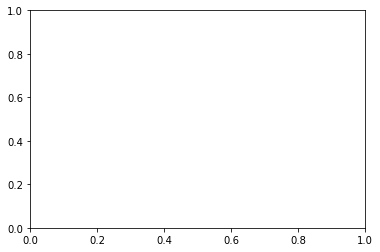

In [54]:
from sklearn import metrics
ax=plt.subplot(111)

In [55]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor,BernoulliRBM
from sklearn.naive_bayes import GaussianNB,CategoricalNB
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [56]:
model_lr=LogisticRegression(solver='liblinear',max_iter=100)
model_lr.fit(X_train,y_train)
pred=model_lr.predict_proba(X_test)
metrics.log_loss(y_test,pred),model_lr.score(X_test,y_test)


(0.4808739061967935, 0.7847858910698442)

In [57]:
def pred_2nd(pred):
    pred1=[]
    for i in pred:
        pred1.append(i[1])
    return pred1
pred=pred_2nd(pred)

In [58]:
fprlr, tprlr, thresholdslr = metrics.roc_curve(y_test, pred, pos_label=2)


In [79]:
# acc_matrix=[]
# acc_matrix1=[]
# for i in range(1,5):
#     model3=KNeighborsClassifier(n_neighbors=i)
#     model3.fit(X_train,y_train)
#     acc_matrix.append(metrics.log_loss(y_test,model3.predict(X_test)))
#     print (i)
#best model i=47
model_KNN=KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train,y_train)


KNeighborsClassifier()

In [83]:
pred=model_KNN.predict_proba(X_test)
pred=model_KNN.predict(X_test)
metrics.accuracy_score(y_test,pred)
#plt.plot(acc_matrix)
#pred=model_KNN.predict_proba(X_test)

0.7505720467599583

In [84]:
pred=model_KNN.predict_proba(X_test)
metrics.log_loss(y_test,pred)


2.16264756201641

In [85]:
pred=pred_2nd(pred)
fprknn, tprknn, thresholdsknn = metrics.roc_curve(y_test, pred, pos_label=2)

In [ ]:
print(pd.crosstab(y_test,pred))
print(metrics.classification_report(y_test,pred))


In [ ]:
#sns.scatterplot(y_test,model_KNN.predict(X_test))

In [59]:
model_DT=DecisionTreeClassifier()
model_DT.fit(X_train,y_train)
pred=model_DT.predict_proba(X_test)
print(metrics.log_loss(y_test,pred),model_DT.score(X_test,y_test))
pred=pred_2nd(pred)
fprdt, tprdt, thresholdsdt = metrics.roc_curve(y_test, pred, pos_label=2)


9.937703916068049 0.7122021076226204


In [60]:
#RandomForestClassifier,VotingClassifier,GradientBoostingClassifier

In [61]:
model_RF=RandomForestClassifier()
model_RF.fit(X_train,y_train)
pred=model_RF.predict_proba(X_test)
print(metrics.log_loss(y_test,pred),model_RF.score(X_test,y_test))
pred=pred_2nd(pred)
fprrf, tprrf, thresholdsrf = metrics.roc_curve(y_test, pred, pos_label=2)


0.48060850390335685 0.7843344800211696


In [62]:
model_GBC=GradientBoostingClassifier()
model_GBC.fit(X_train,y_train)
pred=model_GBC.predict_proba(X_test)
print(metrics.log_loss(y_test,pred),model_GBC.score(X_test,y_test))
pred=pred_2nd(pred)
fprgb, tprgb, thresholdsgb = metrics.roc_curve(y_test, pred, pos_label=2)


0.45025402720187374 0.7911056457512881


In [86]:
modelv=VotingClassifier(estimators=[('model_KNN', model_KNN),('model_DT', model_DT), ('model_RF', model_RF), ('model_GBC', model_GBC)], voting='soft')
modelv.fit(X_train,y_train)#('model_KNN', model_KNN),
pred=modelv.predict_proba(X_test)
print(metrics.log_loss(y_test,pred),modelv.score(X_test,y_test))
pred=pred_2nd(pred)
fprv, tprv, thresholdsv = metrics.roc_curve(y_test, pred, pos_label=2)


0.47421507422215853 0.775570879317591


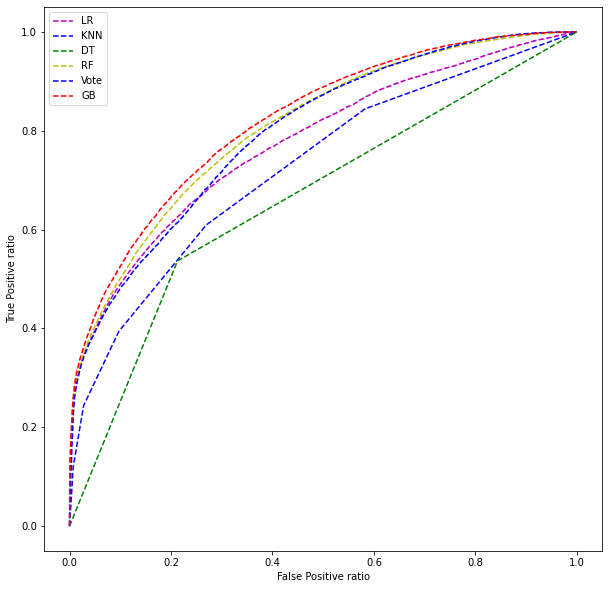

In [87]:
plt.figure(figsize=(10,10))
plt.plot(fprlr,tprlr,label='LR',c='m',linestyle='dashed')
plt.plot(fprknn,tprknn,label='KNN',c='b',linestyle='dashed')
plt.plot(fprdt,tprdt,label='DT',c='g',linestyle='dashed')
plt.plot(fprrf,tprrf,label='RF',c='y',linestyle='dashed')

plt.plot(fprv,tprv,label='Vote',c='b',linestyle='dashed')
plt.plot(fprgb,tprgb,label='GB',c='r',linestyle='dashed')
plt.xlabel("False Positive ratio")
plt.ylabel("True Positive ratio")
plt.legend()

In [88]:
importance=pd.DataFrame({'importance':model_GBC.feature_importances_} ,index=X_train.columns)

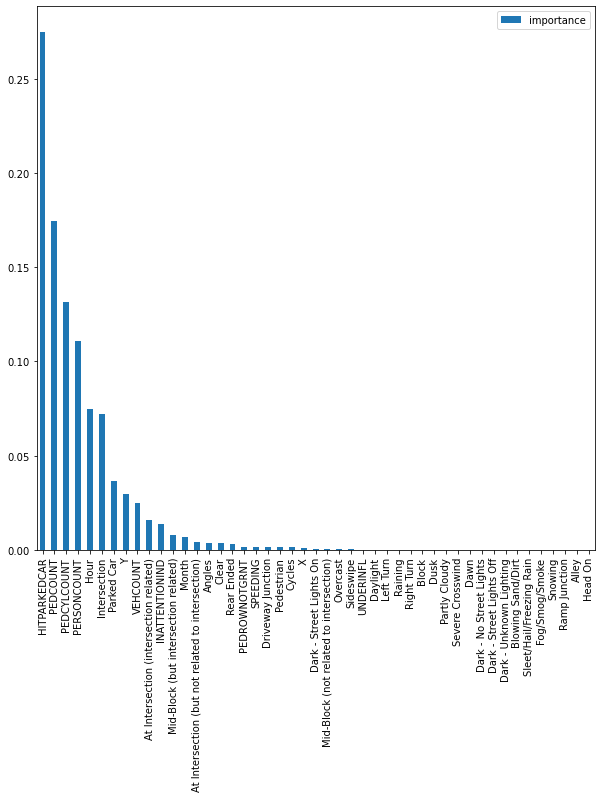

In [91]:
fig=plt.figure(figsize=(10,10))
ax=plt.subplot(111)
importance.sort_values(by='importance',ascending=False).plot(kind='bar',ax=ax)

In [94]:
!pip install LIBSVM

  Created wheel for LIBSVM: filename=libsvm-3.23.0.4-py3-none-any.whl size=150381 sha256=5df1a7ccc6c78dddba8abc3a03f0b3efdaec0ff95dfaf44aef2def56531a19e3
  Stored in directory: c:\users\mohammad\appdata\local\pip\cache\wheels\3a\17\d6\21cf2c23637f7fd16b5079f2a23146d8961d13c56659668552
Successfully built LIBSVM


You should consider upgrading via the 'c:\users\mohammad\miniconda3\python.exe -m pip install --upgrade pip' command.


In [98]:
model_GBC_y=GradientBoostingClassifier()
model_GBC_y.fit(X_train,y_train)
pred=model_GBC_y.predict_proba(X_test)
print(metrics.log_loss(y_test,pred),model_GBC_y.score(X_test,y_test))
pred=pred_2nd(pred)
fprgb, tprgb, thresholdsgb = metrics.roc_curve(y_test, pred, pos_label=2)
